In [2]:
import numpy as np
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fast')
import random
from numpy import random

In [3]:
# Coupling constant 
J = 1.0
kT = 1.0
B = 0.2

In [4]:
# external magnetic field to zero (no magnetic field)
def cal_2D_nomag_energy(spins):
    final = np.zeros([8,8])
    for i in range(1, 8):
        new = np.roll(Initialize, i, axis=1)
        circle = np.dot(new, Initialize)
        final = (final + circle)
    
    return -J*(final/2)

In [5]:
Initialize = random.choice([1],size=(8, 8))
Initialize

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]])

In [6]:
cal_2D_nomag_energy(Initialize)

array([[-28., -28., -28., -28., -28., -28., -28., -28.],
       [-28., -28., -28., -28., -28., -28., -28., -28.],
       [-28., -28., -28., -28., -28., -28., -28., -28.],
       [-28., -28., -28., -28., -28., -28., -28., -28.],
       [-28., -28., -28., -28., -28., -28., -28., -28.],
       [-28., -28., -28., -28., -28., -28., -28., -28.],
       [-28., -28., -28., -28., -28., -28., -28., -28.],
       [-28., -28., -28., -28., -28., -28., -28., -28.]])

In [7]:
def mc_move(spins, kT):
    EA = cal_2D_nomag_energy(spins)
    # randomly pick a spin
    pick_spin_x = np.random.randint(len(spins))
    pick_spin_y = np.random.randint(len(spins))
    spins[pick_spin_x][pick_spin_y] *= -1
    EB = cal_2D_nomag_energy(spins)
    EB = EB.astype(int)
    if np.sum(EB) < np.sum(EA): # accept the move
        pass # pass means don't do anything
    else:
        boltz = np.exp(-(EB-EA)/kT)
        if np.sum(np.random.random([8,8])) < np.sum(boltz):
            pass
        else:
            spins[pick_spin_x][pick_spin_y] *= -1

In [8]:
Initialize

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]])

In [9]:
one_move = mc_move(Initialize, kT)

In [ ]:
#### 1KBT

In [10]:
def run_sim(matrix, steps, kT):
    for i in range(steps):
        mc_move(matrix, kT)
    return matrix

In [11]:
KbT1 = run_sim(Initialize, 100000, 1)

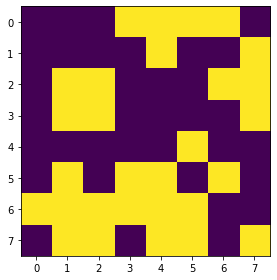

In [12]:
fig, ax = plt.subplots()
im = ax.imshow(KbT1)
fig.tight_layout()

In [13]:
### 2 KbT

KbT2 = run_sim(Initialize, 100000, 2)

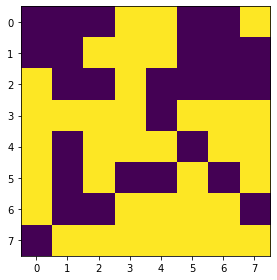

In [14]:
fig, ax = plt.subplots()
im = ax.imshow(KbT2)
fig.tight_layout()

In [15]:
### 4 KBT
KbT4 = run_sim(Initialize, 100000, 4)

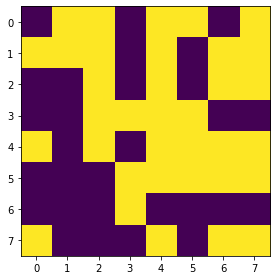

In [16]:
fig, ax = plt.subplots()
im = ax.imshow(KbT4)
fig.tight_layout()

In [17]:
def mag(Initialize, n):
    return (1/n)*(np.sum(Initialize))

In [18]:
##### 1 Kbt
n = 100

mags = np.zeros(n)

for i in range(n):
    mags[i] = mag(Initialize,n)
    mc_move(Initialize, 1)
    

Text(0, 0.5, 'Magnetization')

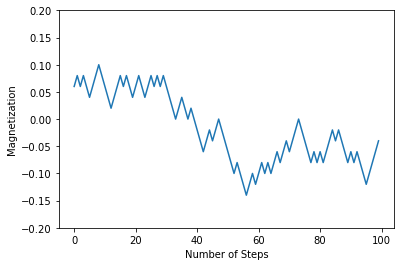

In [19]:
plt.plot(mags)
plt.ylim(-0.2,0.2)
plt.xlabel('Number of Steps')
plt.ylabel('Magnetization')

In [20]:
#### 2KBT
n = 100

mags = np.zeros(n)

for i in range(n):
    mags[i] = mag(Initialize,n)
    mc_move(Initialize, 2)
 

Text(0, 0.5, 'Magnetization')

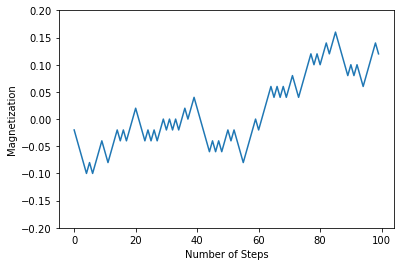

In [21]:
plt.plot(mags)
plt.ylim(-0.2,0.2)
plt.xlabel('Number of Steps')
plt.ylabel('Magnetization')

In [24]:
## 4 KbT
n = 100

mags = np.zeros(n)

for i in range(n):
    mags[i] = mag(Initialize,n)
    mc_move(Initialize, 4)
  

Text(0, 0.5, 'Magnetization')

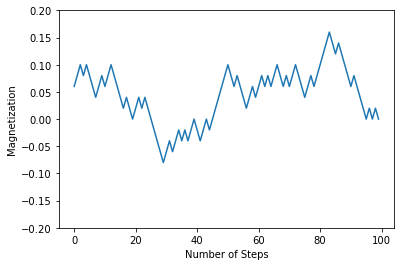

In [25]:
plt.plot(mags)
plt.ylim(-0.2,0.2)
plt.xlabel('Number of Steps')
plt.ylabel('Magnetization')

In [26]:
def calc_energy_particle_pairs(spins, x, y):
    total_energy = 0
    neighbor_x = [0, 0, 0, 0] # Left, Right, Top, Bottom
    neighbor_y = [0, 0, 0, 0] # Left, Right, Top, Bottom
    
    # Left neighbor particle
    if x == 0:
        neighbor_x[0] = len(spins) - 1
    else:
        neighbor_x[0] = x - 1
    neighbor_y[0] = y
    
    # Right neighbor particle
    if x == len(spins)-1:
        neighbor_x[1] = 0
    else:
        neighbor_x[1] = x + 1
    neighbor_y[1] = y
    
    # Top neighbor particle
    neighbor_x[2] = x
    if y == 0:
        neighbor_y[2] = len(spins) - 1
    else:
        neighbor_y[2] = y - 1
        
    # Bottom neighbor particle
    neighbor_x[3] = x
    if y == len(spins) - 1:
        neighbor_y[3] = 0
    else:
        neighbor_y[3] = y + 1
   
    for i in range(4):
        pair_energy = spins[x][y] * spins[neighbor_x[i]][neighbor_y[i]]
        total_energy += pair_energy

    
    return total_energy

In [27]:
def mc_move_particle(spins, kT):
    # randomly pick a spin
    x = np.random.randint(len(spins))
    y = np.random.randint(len(spins))
    
    EA = calc_energy_particle_pairs(spins, x, y)
    
    # flip particle
    spins[x][y] *= -1
    
    EB = calc_energy_particle_pairs(spins, x, y)
    
    energy_diff = EB - EA
    
    if EB < EA:
        pass
    else:
        boltz = np.exp(-(energy_diff)/kT)
        if np.random.random() < boltz:
            pass
        else:
            spins[x][y] *= -1

In [28]:
def mag(Initialize, n):
    return (1/n)*(np.sum(Initialize))

In [29]:
n = 10000000

mags = np.zeros(n)

for i in range(n):
    mags[i] = mag(Initialize,n)
    mc_move_particle(Initialize, 2)
  

In [30]:
mags

array([2.e-07, 0.e+00, 2.e-07, ..., 4.e-07, 4.e-07, 4.e-07])

In [ ]:
######   3F

Text(0, 0.5, 'Magnetization')

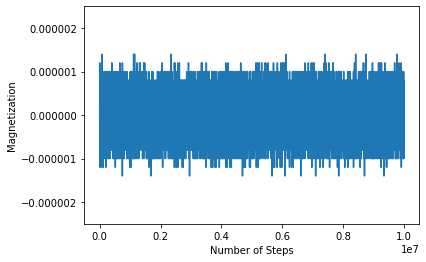

In [31]:
plt.plot(mags)
plt.ylim(-0.0000025,0.0000025)
plt.xlabel('Number of Steps')
plt.ylabel('Magnetization')

In [32]:
hundred = np.ones([100, 100])
hundred[::2, 1::2] = -1
hundred[1::2, ::2] = -1
hundred

array([[ 1., -1.,  1., ..., -1.,  1., -1.],
       [-1.,  1., -1., ...,  1., -1.,  1.],
       [ 1., -1.,  1., ..., -1.,  1., -1.],
       ...,
       [-1.,  1., -1., ...,  1., -1.,  1.],
       [ 1., -1.,  1., ..., -1.,  1., -1.],
       [-1.,  1., -1., ...,  1., -1.,  1.]])

In [ ]:
#### 1 KBT

In [33]:
onehundred = run_sim(hundred, 100000, 1)

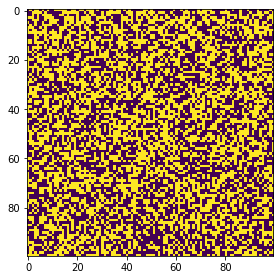

In [34]:
fig, ax = plt.subplots()
im = ax.imshow(onehundred)
fig.tight_layout()

In [ ]:
### 2 KBT

In [35]:
twohundred = run_sim(hundred, 100000, 2)

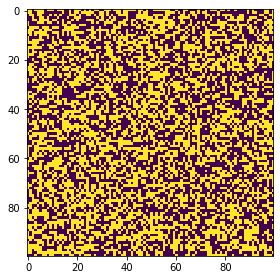

In [36]:
fig, ax = plt.subplots()
im = ax.imshow(twohundred)
fig.tight_layout()

In [ ]:
### 4 KBT

In [37]:
fourhundred = run_sim(hundred, 100000, 4)

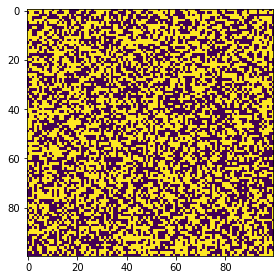

In [38]:
fig, ax = plt.subplots()
im = ax.imshow(fourhundred)
fig.tight_layout()